# LAB 2

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from io import StringIO
import logging
import numpy as np
import pickle
import pandas as pd
import requests

# –¢—Ä–µ—Ç—å–∏-–ø–∞—Ä—Ç–∏ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import mlflow
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns

# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ –¥–ª—è –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from tpot import TPOTClassifier
from fedot.api.main import Fedot

# MLflow-–±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import mlflow.sklearn

### –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [3]:
url = 'https://raw.githubusercontent.com/AI-is-out-there/data2lab/refs/heads/main/–º–æ–¥—É–ª—å 2 - –¥–∞—Ç–∞—Å–µ—Ç - –ø—Ä–∞–∫—Ç–∏–∫–∞.csv'

response = requests.get(url)
response.encoding = 'utf-8'  # –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –∫–æ–¥–∏—Ä–æ–≤–∫—É
data = StringIO(response.text)

df = pd.read_csv(data)
df

subject_id  Count_subj  study_id  cart_id  Healthy_Status eeg_time   \
0       19557662          27  40000017  6848296               0   8:44 AM   
1       18477137          93  40000029  6848296               0   9:54 AM   
2       16598616           3  40000035  6376932               1   9:07 AM   
3       16368287           7  40000079  6214760               1   5:14 PM   
4       18370366           2  40000084  6632385               0   1:52 PM   
...          ...         ...       ...      ...             ...       ...   
9995    19612562          29  40125255  6752764               1  11:26 AM   
9996    14816795           1  40125256  6555070               1   6:01 PM   
9997    11919067           4  40125266  6632385               0   9:58 AM   
9998    13871862           2  40125273  6848296               1   5:38 PM   
9999    14747544          12  40125285  6848296               0  11:58 PM   

       eeg_date            report_0                                 report_1  \
0     27.06.2015       Sinus rhythm        Possible right atrial abnormality   
1     27.06.2015       Sinus rhythm        Possible right atrial abnormality   
2     28.06.2015  Sinus tachycardia                                      NaN   
3     15.07.2015       Sinus rhythm                                      NaN   
4     27.09.2015       Sinus rhythm                                      NaN   
...          ...                ...                                      ...   
9995  12.04.2016       Sinus rhythm                                      NaN   
9996  12.04.2016       Sinus rhythm                                      NaN   
9997  23.02.2014       Sinus rhythm                                      NaN   
9998  03.01.2011       Sinus rhythm                                      NaN   
9999  03.01.2011       Sinus rhythm  Inferior T wave changes are nonspecific   

                        report_2  ...                    filtering  \
0                            NaN  ...  60 Hz notch Baseline filter   
1                            NaN  ...  60 Hz notch Baseline filter   
2     Normal ECG except for rate  ...  60 Hz notch Baseline filter   
3                     Normal ECG  ...  60 Hz notch Baseline filter   
4                            NaN  ...              <not specified>   
...                          ...  ...                          ...   
9995                  Normal ECG  ...  60 Hz notch Baseline filter   
9996                  Normal ECG  ...  60 Hz notch Baseline filter   
9997                         NaN  ...              <not specified>   
9998                  Normal ECG  ...  60 Hz notch Baseline filter   
9999                         NaN  ...  60 Hz notch Baseline filter   

     rr_interval p_onset  p_end qrs_onset qrs_end t_end p_axis qrs_axis t_axis  
0            659      40    128       170     258   518     81       77     79  
1            722      40    124       162     246   504     77       75     70  
2            600      40    130       162     244   474     79       72     77  
3            659      40    146       180     254   538     79       66     69  
4            659     368  29999       504     590   868     84       80     77  
...          ...     ...    ...       ...     ...   ...    ...      ...    ...  
9995         606      40    162       204     298   526     64       68     66  
9996         606      40    160       202     294   534     70       73     66  
9997         870     348  29999       506     586   882     49       64     49  
9998         789      40    158       192     288   592     43       14     15  
9999         923      40    158       200     292   630     30       20     13  

[10000 rows x 36 columns]

### –ü–µ—Ä–≤–∏—á–Ω—ã–µ –∞–Ω–∞–ª–∏–∑ –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [4]:
print(df.dtypes)
df.isna().sum()

subject_id          int64
Count_subj          int64
study_id            int64
cart_id             int64
Healthy_Status      int64
eeg_time           object
eeg_date           object
report_0           object
report_1           object
report_2           object
report_3           object
report_4           object
report_5           object
report_6           object
report_7           object
report_8           object
report_9           object
report_10          object
report_11          object
report_12          object
report_13          object
report_14          object
report_15         float64
report_16         float64
report_17         float64
bandwidth          object
filtering          object
rr_interval         int64
p_onset             int64
p_end               int64
qrs_onset           int64
qrs_end             int64
t_end               int64
p_axis              int64
qrs_axis            int64
t_axis              int64
dtype: object


subject_id            0
Count_subj            0
study_id              0
cart_id               0
Healthy_Status        0
eeg_time              0
eeg_date              0
report_0              0
report_1           2532
report_2           3532
report_3           5094
report_4           7218
report_5           8519
report_6           9326
report_7           9692
report_8           9886
report_9           9971
report_10          9983
report_11          9991
report_12          9999
report_13          9998
report_14          9999
report_15         10000
report_16         10000
report_17         10000
bandwidth             0
filtering             0
rr_interval           0
p_onset               0
p_end                 0
qrs_onset             0
qrs_end               0
t_end                 0
p_axis                0
qrs_axis              0
t_axis                0
dtype: int64

#### –£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–Ω—É–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ü–æ–ª—É—á–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –º–æ–∂–Ω–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å —Ç–∞–∫, —á—Ç–æ –ø–æ –∫–∞–∂–¥–æ–º—É –Ω–∞–±–ª—é–¥–µ–Ω–∏—é –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –æ—Ç—á—ë—Ç–æ–≤, –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö report –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–∞–Ω—á–µ–Ω–∏–π —Ä–∞—Å—Ç—ë—Ç —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –Ω–æ–º–µ—Ä–∞ –æ—Ç—á—ë—Ç–∞, –¥–∞–Ω–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –∏–º–µ—é—Ç —Å—Ç—Ä–æ–∫–æ—Ä–≤—ã–π —Ç–∏–ø. –î–ª—è –±—É–¥—É—â–µ–≥–æ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è boxplot —Å—Ç–æ–∏—Ç –æ—Å—Ç–∞–≤–∏—Ç—å —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏. –¢–∞–∫–∂–µ, –Ω–∞–º –Ω–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã, –ø–æ—ç—Ç–æ–º—É –∏—Ö –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å

In [5]:
df.drop(['subject_id', 'Count_subj', 'study_id', 'cart_id'], axis=1, inplace=True)

–í—ã–≤–µ–¥–µ–º –¥–æ–ø–æ–ª–æ–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏

In [6]:
numb_cols = [x for x in df.columns if 'report' not in x and df.dtypes[x] != 'object']
df_wo_reports = df[numb_cols]

print(df_wo_reports.describe())
print('_'*60)
print(df['Healthy_Status'].value_counts())

       Healthy_Status   rr_interval      p_onset         p_end     qrs_onset  \
count    10000.000000  10000.000000  10000.00000  10000.000000  10000.000000   
mean         0.200700    880.614300   4781.92660   8930.689000    294.337500   
std          0.400544   1350.168399  10879.47242  13602.948503   1266.163235   
min          0.000000      0.000000     14.00000      0.000000      0.000000   
25%          0.000000    682.000000     40.00000    144.000000    188.000000   
50%          0.000000    810.000000     40.00000    158.000000    200.000000   
75%          0.000000    952.000000    329.00000  29999.000000    228.000000   
max          1.000000  29999.000000  29999.00000  29999.000000  29999.000000   

            qrs_end         t_end        p_axis      qrs_axis        t_axis  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  
mean     403.255900    697.381600   5077.596000    144.047600    227.735800  
std     1366.191721   1317.597859  11248.0709

–ü–æ—Å—Ç—Ä–æ–∏–º Boxplot –Ω–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

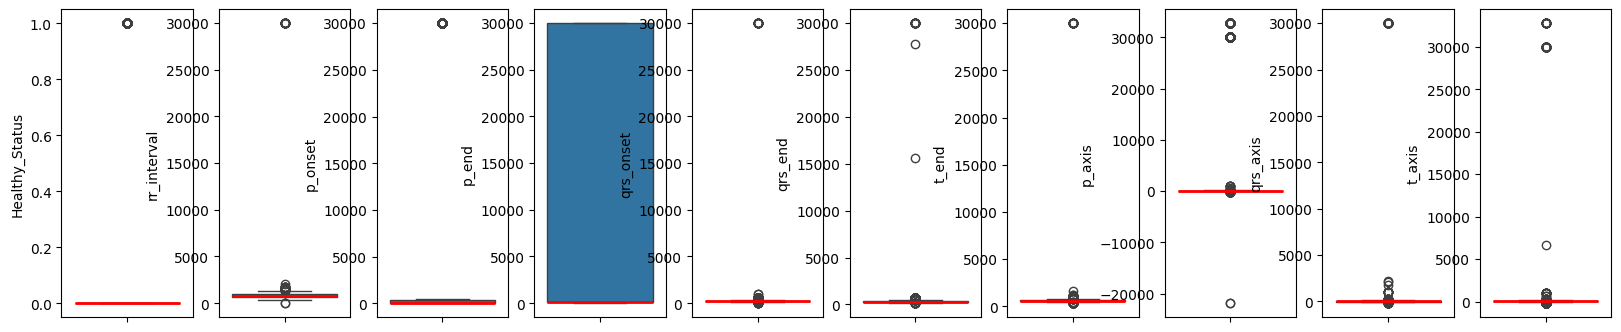

In [7]:
n = df_wo_reports.shape[1]
fig,ax = plt.subplots(1,n, figsize=(n*2,4), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = df_wo_reports.columns[i]
    sns.boxplot(y = df_wo_reports.iloc[:,i],data=df_wo_reports, medianprops={"color": "r", "linewidth": 2})

–ù–∞ —á–∞—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö —á—ë—Ç–∫–æ –≤–∏–¥–Ω—ã –≤—ã–±—Ä–æ—Å—ã, –∏–∑–±–∞–≤–∏–º—Å—è –æ—Ç –Ω–∏—Ö. –¢–∞–∫–∂–µ, –Ω–∞ –≤—Å—è–∫–∏–π —Å–ª—É—á–∞–π –æ—Ç—Å–µ–µ–º —Å—Ç—Ä–æ–∫–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ –≤–æ–ª–Ω—ã –∏–ª–∏ –∫–æ–º–ø–ª–µ–∫—Å–∞ –±–æ–ª—å—à–µ, —á–µ–º –∫–æ–Ω–µ—Ü (—è, –∫–æ–Ω–µ—á–Ω–æ, –ª—é–±–ª—é —Ñ–∏–ª—å–º "–ù–∞–∑–∞–¥ –≤ –±—É–¥—É—â–µ–µ", –Ω–æ —ç—Ç–æ –Ω–µ —Ç–æ—Ç —Å–ª—É—á–∞–π)

#### –£–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤

In [8]:
outlier_columns = ['rr_interval', 'p_axis', 'p_end', 'p_onset', 'qrs_axis', 'qrs_end', 'qrs_onset', 't_axis', 't_end']
# –§–∏–ª—å—Ç—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ, —É–¥–∞–ª—è—è —Å—Ç—Ä–æ–∫–∏ —Å –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –±–æ–ª—å—à–µ 2000 –≤ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö
filtered_df = df.loc[
    (df[outlier_columns] < 2000).all(axis=1)
]
# –î–æ–±–∞–≤–ª—è–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π —Ñ–∏–ª—å—Ç—Ä –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –ª–æ–≥–∏—á–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö 'p_onset' –∏ 'qrs_onset'
filtered_df = filtered_df.query(
    '(p_onset < p_end) & (qrs_onset < qrs_end)'
)

filtered_df = filtered_df.rename(columns={'eeg_time ': 'eeg_time', 'eeg_date ': 'eeg_date'})
filtered_df.shape[0]

7046

In [9]:
filtered_df['p_onset'].value_counts()

40    7043
24       2
14       1
Name: p_onset, dtype: int64

–ò–∑ value_counts –∫–æ–ª–æ–Ω–∫–∏ p_onset, –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –¥–∞–Ω–Ω—É—é –∫–æ–ª–æ–Ω–∫—É —Ç–æ–∂–µ –º–æ–∂–Ω–æ —É–±—Ä–∞—Ç—å –∏–∑ –≤—ã–±–æ—Ä–∫–∏

In [10]:
filtered_df.drop(['p_onset'], axis=1, inplace=True)

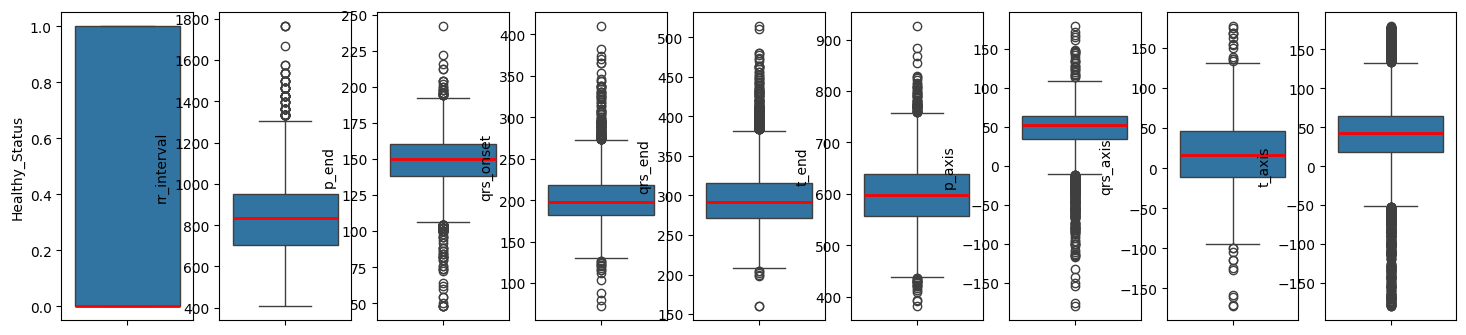

In [11]:
numb_cols = [x for x in filtered_df.columns if 'report' not in x and filtered_df.dtypes[x] != 'object']
n = filtered_df[numb_cols].shape[1]
fig,ax = plt.subplots(1,n, figsize=(n*2,4), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = filtered_df[numb_cols].columns[i]
    sns.boxplot(
        y = filtered_df[numb_cols].iloc[:,i],
        data=filtered_df[numb_cols],
        medianprops={"color": "r", "linewidth": 2}
    )

#### –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤

–ö–∞—Å–∞–µ–º–æ —Ç–µ–∫—Å—Ç–æ–≤ - –≤ —ç—Ç–∞–ª–æ–Ω–Ω–æ–º –≤–∞—Ä–∏–∞–Ω—Ç–µ –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è —Å–¥–µ–ª–∞—Ç—å word2vec, –∞ –∑–∞—Ç–µ–º –≤–µ—Å—å –≤–µ–∫—Ç–æ—Ä —Å—Ö–ª–æ–ø–Ω—É—Ç—å –¥–æ –æ–¥–Ω–æ–≥–æ —á–∏—Å–ª–∞. –ù–æ –∏–∑-–∑–∞ —Ç–∞–∫–æ–≥–æ —Å—Ö–ª–∞–ø—ã–≤–∞–Ω–∏—è –º–æ–∂–Ω–æ –ø–æ—Ç–µ—Ä—è—Ç—å –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –ø–æ—ç—Ç–æ–º—É –º—ã –ø–æ—Å—Ç—Ä–æ–∏–º –ø–æ–ª–Ω–æ—Ü–µ–Ω–Ω—ã–µ —ç–º–±–µ–¥–∏–Ω–≥–∏ –¥–ª—è —Ç–µ–∫—Ç–æ–≤. –≠–º–±–µ–¥–∏–Ω–≥–∏ –±—É–¥–µ–º —Å—Ç—Ä–æ–∏—Ç—å, –∏—Å–ø–æ–ª—å–∑—É—è nlp-–º–æ–¥–µ–ª—å E5(EmbEddings from bidirEctional Encoder rEpresentations).

–°–æ–±–µ—Ä—ë–º –æ—Ç—á—ë—Ç—ã –≤ –æ–¥–∏–Ω –≤ —Ä–∞–º–∫–∞—Ö –∫–∞–∂–¥–æ–≥–æ –∏–∑ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π.

In [12]:
# –°–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫ –Ω–∞–∑–≤–∞–Ω–∏–π —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è –æ—Ç—á–µ—Ç–æ–≤
report_columns = [f'report_{x}' for x in range(18)]

# –û–±—ä–µ–¥–∏–Ω—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö –æ—Ç—á–µ—Ç–æ–≤ –≤ –æ–¥–Ω—É —Å—Ç—Ä–æ–∫—É
filtered_df['report'] = filtered_df[report_columns].astype(str).agg(' '.join, axis=1)

# –û—á–∏—â–∞–µ–º –¥–∞–Ω–Ω—ã–µ –æ—Ç NaN –∏ –ª–∏—à–Ω–∏—Ö –ø—Ä–æ–±–µ–ª–æ–≤
filtered_df['report'] = (
    filtered_df['report']
    .str.replace(r'\bnan\b', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

# –£–¥–∞–ª—è–µ–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã —Å –æ—Ç—á–µ—Ç–∞–º–∏
reports_to_drop = [f'report_{x}' for x in range(18)]
filtered_df.drop(reports_to_drop, axis=1, inplace=True)

filtered_df


Healthy_Status  eeg_time    eeg_date     bandwidth  \
0                  0   8:44 AM  27.06.2015  0.005-150 Hz   
1                  0   9:54 AM  27.06.2015  0.005-150 Hz   
2                  1   9:07 AM  28.06.2015  0.005-150 Hz   
3                  1   5:14 PM  15.07.2015  0.005-150 Hz   
6                  1  12:54 PM  23.03.2016  0.005-150 Hz   
...              ...       ...         ...           ...   
9994               1   8:39 AM  04.04.2016  0.005-150 Hz   
9995               1  11:26 AM  12.04.2016  0.005-150 Hz   
9996               1   6:01 PM  12.04.2016  0.005-150 Hz   
9998               1   5:38 PM  03.01.2011  0.005-150 Hz   
9999               0  11:58 PM  03.01.2011  0.005-150 Hz   

                        filtering  rr_interval  p_end  qrs_onset  qrs_end  \
0     60 Hz notch Baseline filter          659    128        170      258   
1     60 Hz notch Baseline filter          722    124        162      246   
2     60 Hz notch Baseline filter          600    130        162      244   
3     60 Hz notch Baseline filter          659    146        180      254   
6     60 Hz notch Baseline filter          952    146        198      282   
...                           ...          ...    ...        ...      ...   
9994  60 Hz notch Baseline filter          769    166        214      302   
9995  60 Hz notch Baseline filter          606    162        204      298   
9996  60 Hz notch Baseline filter          606    160        202      294   
9998  60 Hz notch Baseline filter          789    158        192      288   
9999  60 Hz notch Baseline filter          923    158        200      292   

      t_end  p_axis  qrs_axis  t_axis  \
0       518      81        77      79   
1       504      77        75      70   
2       474      79        72      77   
3       538      79        66      69   
6       598      24        80      20   
...     ...     ...       ...     ...   
9994    592      55        60      68   
9995    526      64        68      66   
9996    534      70        73      66   
9998    592      43        14      15   
9999    630      30        20      13   

                                                 report  
0     Sinus rhythm Possible right atrial abnormality...  
1     Sinus rhythm Possible right atrial abnormality...  
2          Sinus tachycardia Normal ECG except for rate  
3                               Sinus rhythm Normal ECG  
6                               Sinus rhythm Normal ECG  
...                                                 ...  
9994                            Sinus rhythm Normal ECG  
9995                            Sinus rhythm Normal ECG  
9996                            Sinus rhythm Normal ECG  
9998                            Sinus rhythm Normal ECG  
9999  Sinus rhythm Inferior T wave changes are nonsp...  

[7046 rows x 14 columns]

In [13]:
import re
import torch.nn.functional as F_torch

from torch import Tensor
from transformers import AutoTokenizer, AutoModel

task = 'Find the most similar report for a given report'
tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-large-instruct')
model = AutoModel.from_pretrained('intfloat/multilingual-e5-large-instruct')

def get_detailed_instruct(task_description: str, query: str) -> str:
    return f'–ò–Ω—Å—Ç—Ä—É–∫—É—Ü–∏—è: {task_description}\n–ó–∞–ø—Ä–æ—Å: {query}'

def text_normalization(text):
    '''
    –ù–æ—Ä–º–∞–ª—å–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞ - –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É,
    —É–¥–∞–ª–µ–Ω–∏–µ –ª–∏—à–Ω–∏—Ö —Å–∏–º–≤–æ–ª–æ–≤.
    '''
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

def average_pool(
    last_hidden_states: Tensor,
    attention_mask: Tensor
) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

def emb_calc(text):
    model.eval()
    
    text = text_normalization(get_detailed_instruct(task, text))
    input_texts = [text]
    
    # Tokenize the input texts
    batch_dict = tokenizer(input_texts, max_length=512, padding=True, truncation=True, return_tensors='pt')

    outputs = model(**batch_dict)
    embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])
    # normalize embeddings
    embeddings = F_torch.normalize(embeddings, p=2, dim=1)
    
    return embeddings.flatten().tolist()


In [14]:
from tqdm import tqdm

tqdm.pandas()
filtered_df['report_embedding'] = filtered_df['report'].progress_apply(emb_calc)

print(filtered_df.shape)
filtered_df.head(3)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7046/7046 [18:20<00:00,  6.40it/s]

(7046, 15)


Healthy_Status eeg_time    eeg_date     bandwidth  \
0               0  8:44 AM  27.06.2015  0.005-150 Hz   
1               0  9:54 AM  27.06.2015  0.005-150 Hz   
2               1  9:07 AM  28.06.2015  0.005-150 Hz   

                     filtering  rr_interval  p_end  qrs_onset  qrs_end  t_end  \
0  60 Hz notch Baseline filter          659    128        170      258    518   
1  60 Hz notch Baseline filter          722    124        162      246    504   
2  60 Hz notch Baseline filter          600    130        162      244    474   

   p_axis  qrs_axis  t_axis  \
0      81        77      79   
1      77        75      70   
2      79        72      77   

                                              report  \
0  Sinus rhythm Possible right atrial abnormality...   
1  Sinus rhythm Possible right atrial abnormality...   
2       Sinus tachycardia Normal ECG except for rate   

                                    report_embedding  
0  [0.04227232187986374, 0.006614805199205875, -0...  
1  [0.04227232187986374, 0.006614805199205875, -0...  
2  [0.018186617642641068, -0.009253554977476597, ...

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ –≤ –ø–æ–ª—É—á–∏–≤—à–∏—Ö—Å—è –¥–∞–Ω–Ω—ã—Ö (Healthy_Status: 0 = –ø–∞—Ü–∏–µ–Ω—Ç, 1 - —É—Å–ª–æ–≤–Ω–æ –∑–¥–æ—Ä–æ–≤—ã–π)

2025-04-02 23:58:15,185 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-02 23:58:15,197 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


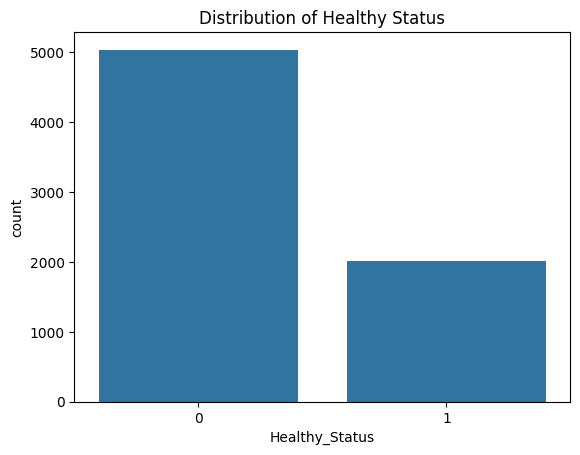

In [15]:
sns.countplot(data=filtered_df, x="Healthy_Status")
plt.title("Distribution of Healthy Status")
plt.show()

#### –û—Ü–µ–Ω–∫–∞ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –¥–∞–Ω–Ω—ã—Ö –¥–∞—Ç–∞—Å–µ—Ç–∞

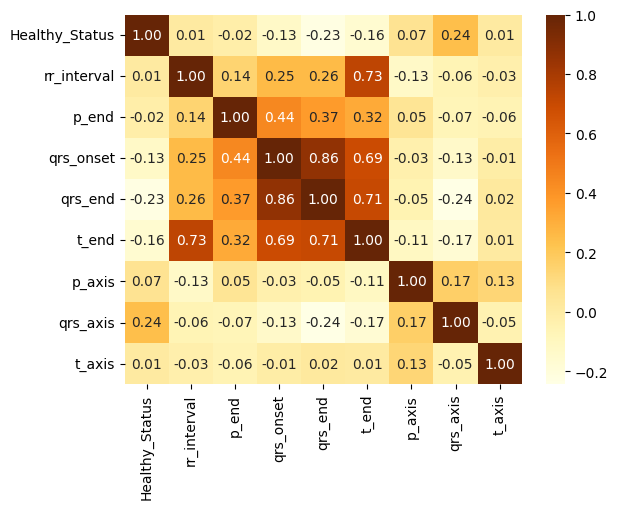

In [16]:
sns.heatmap(
    filtered_df.corr(),
    annot=True,
    fmt="0.2f",
    cmap='YlOrBr')
plt.show()

–í —Ç–∞–±–ª–∏—Ü–µ –≤–∏–¥–Ω–∞ –Ω–µ–∫–æ—Ç–æ—Ä–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂—É —Ñ–∏—á–∞–º–∏ –≤—Ä–µ–º–µ–Ω–∏ (–≤ –º–∏–ª–∏—Å–µ–∫—É—Ü–Ω–¥–∞—Ö), —è–≤–Ω—ã—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π, –±–ª–∏–∑–∫–∏—Ö –∫ 1, –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ. –ü–æ—Å—Ç—Ä–æ–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É —Å –ø–æ–º–æ—â—å—é pairplot

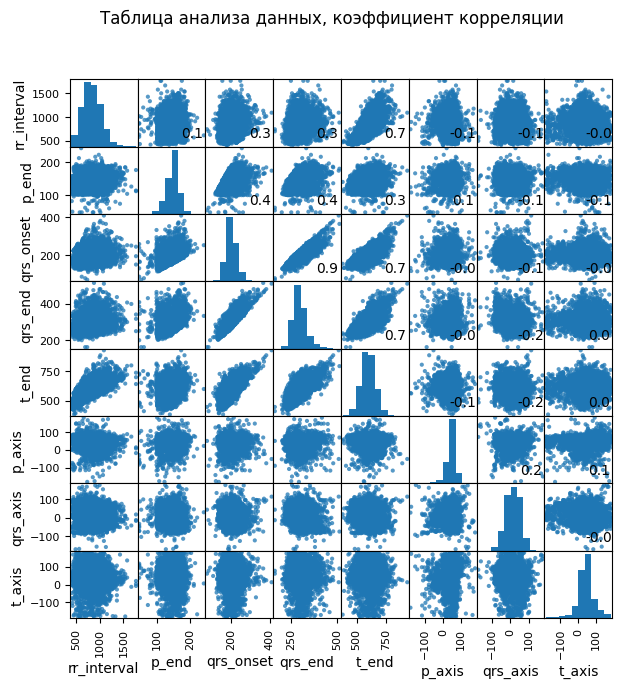

In [17]:
df = filtered_df.select_dtypes(include =[np.number]).copy() # keep only numerical columns
df.drop(columns=['Healthy_Status'], inplace=True)
# Remove rows and columns that would lead to df being singular
df = df.dropna(axis='columns')
df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
columnNames = list(df)
if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
    columnNames = columnNames[:10]
df = df[columnNames]
ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[7, 7], diagonal='hist')
corrs = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate('%.1f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=10)
plt.suptitle('–¢–∞–±–ª–∏—Ü–∞ –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö, –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏')
plt.show()

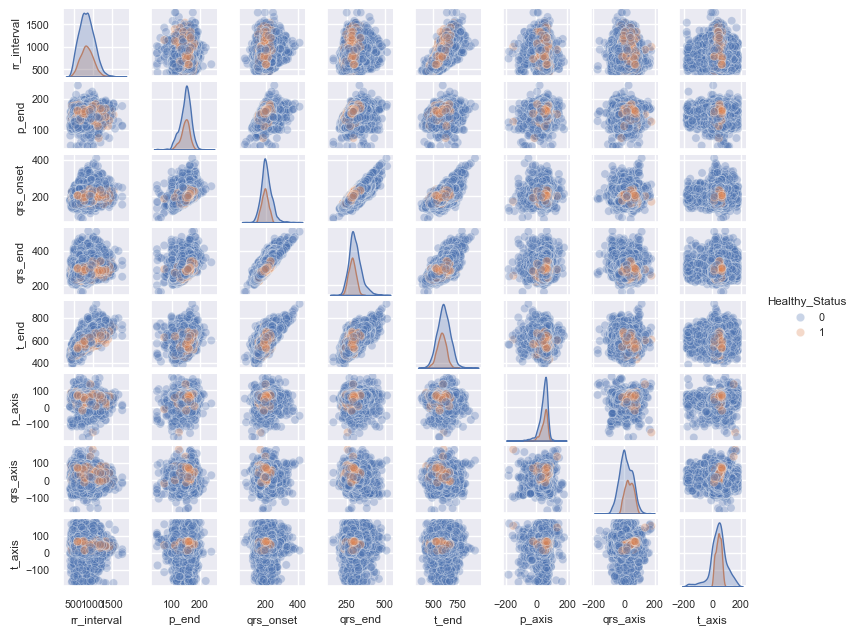

In [18]:
sns.set(font_scale=0.7)
sns.pairplot(
    filtered_df,
    hue = "Healthy_Status",
    height=0.8,
    aspect=1.2,
    plot_kws=dict(alpha=0.3)
)

–ë–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –∏–º–µ–µ—Ç —Å–∏–ª—å–Ω–æ –ø–µ—Ä–µ–∫—Ä—ã–≤–∞—é—â–∏–µ—Å—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –∏—Ö –±—É–¥–µ—Ç —Å–ª–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø–æ –æ—Ç–¥–µ–ª—å–Ω–æ—Å—Ç–∏ –¥–ª—è —Ö–æ—Ä–æ—à–µ–≥–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤. –í–∏–¥–µ–Ω —Å–∏–ª—å–Ω—ã–π –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤

–†–∞–∑–≤–µ—Ä–Ω—ë–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–∞–Ω–µ–µ —ç–º–±–µ–¥–∏–Ω–≥–∏

In [19]:
df_expanded = filtered_df['report_embedding'].apply(pd.Series)
df_expanded.columns = [f'embedding_{i+1}' for i in df_expanded.columns]
df_expanded = pd.concat([filtered_df.drop('report_embedding', axis=1), df_expanded], axis=1)

df_expanded.head(3)

Healthy_Status eeg_time    eeg_date     bandwidth  \
0               0  8:44 AM  27.06.2015  0.005-150 Hz   
1               0  9:54 AM  27.06.2015  0.005-150 Hz   
2               1  9:07 AM  28.06.2015  0.005-150 Hz   

                     filtering  rr_interval  p_end  qrs_onset  qrs_end  t_end  \
0  60 Hz notch Baseline filter          659    128        170      258    518   
1  60 Hz notch Baseline filter          722    124        162      246    504   
2  60 Hz notch Baseline filter          600    130        162      244    474   

   ...  embedding_1015  embedding_1016  embedding_1017 embedding_1018  \
0  ...       -0.014705       -0.027275        0.019929      -0.033963   
1  ...       -0.014705       -0.027275        0.019929      -0.033963   
2  ...       -0.027245       -0.038788        0.002239      -0.036737   

   embedding_1019  embedding_1020  embedding_1021  embedding_1022  \
0        0.019968        0.002488        0.009422       -0.023444   
1        0.019968        0.002488        0.009422       -0.023444   
2        0.019546        0.012647        0.011644       -0.017534   

   embedding_1023  embedding_1024  
0       -0.004205        0.008589  
1       -0.004205        0.008589  
2       -0.018541        0.009547  

[3 rows x 1038 columns]

(7046, 1038) (7046, 2)
[0.19441412 0.10044111]
0.2948552311055088
2 components at 29.49% explained variance
3 components at 36.28% explained variance
4 components at 41.93% explained variance
5 components at 47.26% explained variance
6 components at 51.13% explained variance
7 components at 54.74% explained variance
8 components at 58.11% explained variance
9 components at 61.04% explained variance
10 components at 63.63% explained variance
11 components at 65.94% explained variance
12 components at 68.04% explained variance
13 components at 69.93% explained variance
14 components at 71.63% explained variance
15 components at 73.22% explained variance
16 components at 74.63% explained variance
17 components at 75.95% explained variance
18 components at 77.17% explained variance
19 components at 78.36% explained variance
20 components at 79.51% explained variance
21 components at 80.51% explained variance
22 components at 81.43% explained variance
23 components at 82.32% explained varia

Text(0, 0.5, 'Second Principal Component')

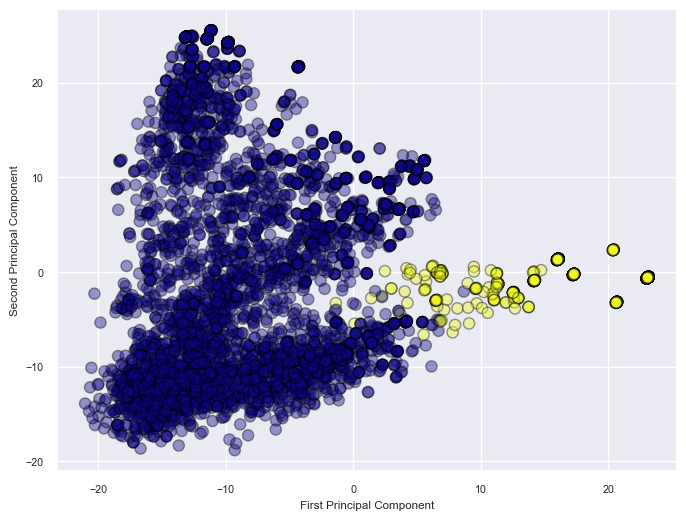

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


table_data_pca = df_expanded.select_dtypes(include =[np.number]).copy()
table_data_pca = table_data_pca.drop('Healthy_Status', axis = 1)

scaled_data = StandardScaler().fit(table_data_pca).transform(table_data_pca)
pca = PCA(n_components = 2).fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(df_expanded.shape, x_pca.shape)

percent = pca.explained_variance_ratio_
print(percent)
print(sum(percent))

def pca_explained(X, threshold):
  features = X.shape[1]
  for i in range(2, features):
    pca = PCA(n_components = i).fit(X)
    sum_ = pca.explained_variance_ratio_
    # add all components explained variances
    percent = sum(sum_)
    print('{} components at {:.2f}% explained variance'.format(i,percent*100))
    if percent > threshold:
      break

pca_explained(scaled_data, 0.85)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df_expanded['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

–ß—ë—Ç–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –±–µ–∑ —Ç–µ–∫—Å—Ç–æ–≤–æ–π –∏–Ω—Ñ–æ—Ä–º–≤–∞—Ü–∏–∏ –Ω–µ –≤–∏–¥–Ω–æ, –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ñ–∏—á–µ–π —ç–º–±–µ–¥–∏–Ω–≥–∞ –¥–∞–ª–æ —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –ò–∑ —Ä–∏—Å—É–Ω–∫–∞ –≤—ã—à–µ, —Å–ª–µ–¥—É–µ—Ç, —á—Ç–æ –∫–ª–∞—Å—Å—ã –º–æ–≥—É—Ç –±—ã—Ç—å –¥–æ–≤–æ–ª—å–Ω–æ –ª–µ–≥–∫–æ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã. **–ò –ì–û–†–ê–ó–î–û –õ–£–ß–®–ï, –ß–ï–ú –í –≠–¢–ê–õ–û–ù–ù–ù–û–ú –í–ê–†–ò–ê–ù–¢–ï!**

Text(0, 0.5, 'Second Principal Component')

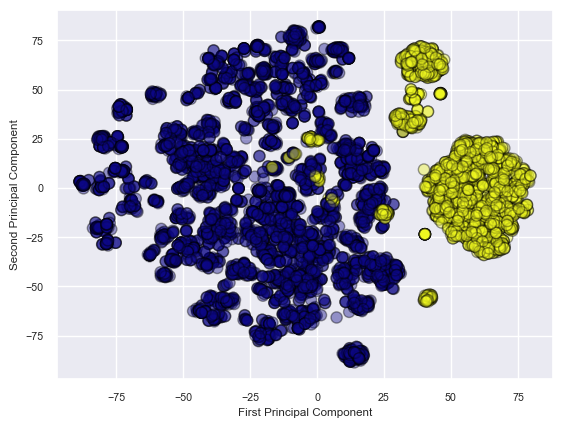

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)
scaled_data_tsne = tsne.fit_transform(scaled_data)
plt.scatter(scaled_data_tsne[:,0], scaled_data_tsne[:,1], c=df_expanded['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


–î–∞–Ω–Ω—ã–π —Ä–∏—Å—É–Ω–æ–∫ –ø–æ–¥–∫–æ—Ä–µ–ø–ª—è–µ—Ç —Å–¥–µ–ª–∞–Ω–Ω—ã–µ —Ä–∞–Ω–µ–µ –≤—ã–≤–æ–¥—ã. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–æ–∏–∑–æ—à–ª–æ –ª—É—á—à–µ, —á–µ–º –ø—Ä–∏ PCA, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏, –∫–æ—Ç–æ—Ä—ã–µ –ª—É—á—à–µ —Ä–∞–∑–¥–µ–ª—è—é—Ç –∫–ª–∞—Å—Å—ã

Time code evaluation for perplexity=1 in 26 sec
Time code evaluation for perplexity=5 in 24 sec
Time code evaluation for perplexity=10 in 26 sec
Time code evaluation for perplexity=15 in 29 sec
Time code evaluation for perplexity=20 in 30 sec
Time code evaluation for perplexity=30 in 32 sec
Time code evaluation for perplexity=40 in 35 sec
Time code evaluation for perplexity=50 in 37 sec
Time code evaluation for perplexity=100 in 48 sec


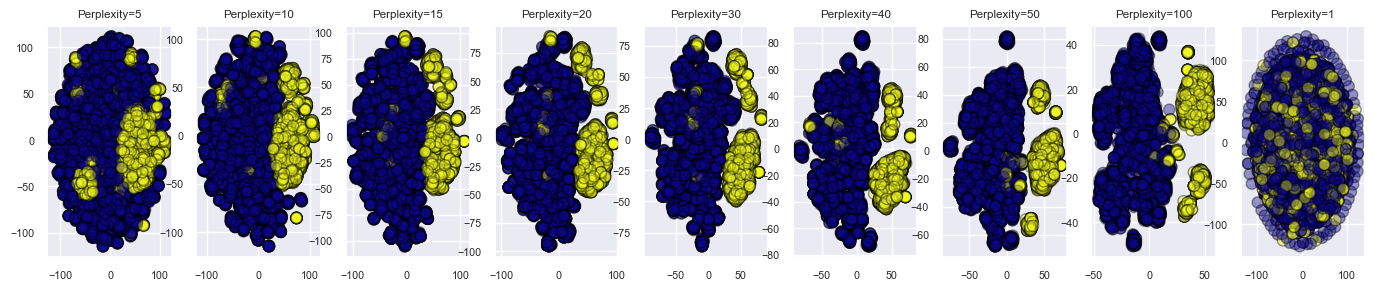

In [22]:
from sklearn import manifold
from time import time

n_components = 2
perplexities = [1, 5, 10, 15, 20, 30, 40, 50, 100]

(fig, subplots) = plt.subplots(1, len(perplexities), figsize=(17, 3))

for i, perplexity in enumerate(perplexities):
    ax = subplots[i-1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
    )

    scaled_data_tsne = tsne.fit_transform(scaled_data)
    t1 = time()

    print("Time code evaluation for perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(
        scaled_data_tsne[:,0],
        scaled_data_tsne[:,1],
        c=df_expanded['Healthy_Status'],
        cmap='plasma',
        alpha=0.4,
        edgecolors='black',
        s=65
    )
    ax.axis("tight")

–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ:
- –õ–æ–∫–∞–ª—å–Ω–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ (–º–µ–ª–∫–∏–µ –∫–ª–∞—Å—Ç–µ—Ä—ã) –¥–æ–º–∏–Ω–∏—Ä—É–µ—Ç –ø—Ä–∏ –º–∞–ª—ã—Ö perplexity.
- –ì–ª–æ–±–∞–ª—å–Ω–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ (–∫—Ä—É–ø–Ω—ã–µ –≥—Ä—É–ø–ø—ã) –ø—Ä–æ—è–≤–ª—è–µ—Ç—Å—è –ø—Ä–∏ –±–æ–ª—å—à–∏—Ö perplexity.
- –û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –≤ —Å—Ä–µ–¥–Ω–µ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ (15‚Äì30), –≥–¥–µ –∫–ª–∞—Å—Ç–µ—Ä—ã —Ö–æ—Ä–æ—à–æ —Ä–∞–∑–ª–∏—á–∏–º—ã.

#### –û–±–æ–≥–∞—â–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞, –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤

–ò–∑ –∞–Ω–∞–ª–∏–∑–∞ –≤—ã—à–µ —è—Å–Ω–æ, —á—Ç–æ –Ω–∞–∏–±–æ–ª—å—à–∏–π –≤–∫–ª–∞–¥ –¥–∞—é—Ç —ç–º–±–µ–¥–∏–Ω–≥–∏ –æ—Ç—á—ë—Ç–æ–≤, –ø–æ—ç—Ç–æ–º—É –º–æ–∂–Ω–æ –±–µ–∑–±–æ–ª–µ–∑–Ω–µ–Ω–Ω–æ –∏–∑–±—ã–≤–∏—Ç—å—Å—è –æ—Ç –≤—Å–µ—Ö –¥—Ä—É–≥–∏—Ö —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –≠—Ç–æ —Ç–∞–∫–∂–µ –æ–±–µ—Å–ø–µ—á–∏—Ç –±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç—É—é —Ä–∞–±–æ—Ç—É —Å autoML –º–µ—Ç–æ–¥–∞–º–∏ –∏ –º–µ—Ç–æ–¥–∞–º–∏ –æ–±–æ–≥–∞—â–µ–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞

In [23]:
df_expanded = df_expanded.select_dtypes(include =[np.number])
df_expanded.head(3)

Healthy_Status  rr_interval  p_end  qrs_onset  qrs_end  t_end  p_axis  \
0               0          659    128        170      258    518      81   
1               0          722    124        162      246    504      77   
2               1          600    130        162      244    474      79   

   qrs_axis  t_axis  embedding_1  ...  embedding_1015  embedding_1016  \
0        77      79     0.042272  ...       -0.014705       -0.027275   
1        75      70     0.042272  ...       -0.014705       -0.027275   
2        72      77     0.018187  ...       -0.027245       -0.038788   

   embedding_1017  embedding_1018  embedding_1019  embedding_1020  \
0        0.019929       -0.033963        0.019968        0.002488   
1        0.019929       -0.033963        0.019968        0.002488   
2        0.002239       -0.036737        0.019546        0.012647   

   embedding_1021  embedding_1022  embedding_1023  embedding_1024  
0        0.009422       -0.023444       -0.004205        0.008589  
1        0.009422       -0.023444       -0.004205        0.008589  
2        0.011644       -0.017534       -0.018541        0.009547  

[3 rows x 1033 columns]

–ò–∑–±–∞–≤–∏–º—Å—è –æ—Ç –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤ –ø—Ä–∏ –ø–æ–º–æ—â–∏ –º–µ—Ç–æ–¥–∞ SMOTE, —É–ø–æ–º—è–Ω—É—Ç–æ–≥–æ –≤ –Ω–æ—É—Ç–±—É–∫–µ —Å –ø–µ—Ä–≤–æ–π –∑–∞–¥–∞—á–µ–π(IRIS)

In [24]:
from imblearn.over_sampling import SMOTE

target_column = 'Healthy_Status'

smote = SMOTE(random_state=42)
X_expanded = df_expanded.drop(target_column, axis=1)
y_expanded = df_expanded[target_column]

X_resampled, y_resampled = smote.fit_resample(X_expanded, y_expanded)

resampled_df = pd.DataFrame(X_resampled, columns=X_expanded.columns)
resampled_df[target_column] = y_resampled

print(resampled_df[target_column].value_counts())
resampled_df.head(3)

0    5039
1    5039
Name: Healthy_Status, dtype: int64


rr_interval  p_end  qrs_onset  qrs_end  t_end  p_axis  qrs_axis  t_axis  \
0          659    128        170      258    518      81        77      79   
1          722    124        162      246    504      77        75      70   
2          600    130        162      244    474      79        72      77   

   embedding_1  embedding_2  ...  embedding_1016  embedding_1017  \
0     0.042272     0.006615  ...       -0.027275        0.019929   
1     0.042272     0.006615  ...       -0.027275        0.019929   
2     0.018187    -0.009254  ...       -0.038788        0.002239   

   embedding_1018  embedding_1019  embedding_1020  embedding_1021  \
0       -0.033963        0.019968        0.002488        0.009422   
1       -0.033963        0.019968        0.002488        0.009422   
2       -0.036737        0.019546        0.012647        0.011644   

   embedding_1022  embedding_1023  embedding_1024  Healthy_Status  
0       -0.023444       -0.004205        0.008589               0  
1       -0.023444       -0.004205        0.008589               0  
2       -0.017534       -0.018541        0.009547               1  

[3 rows x 1033 columns]

Text(0, 0.5, 'Second Principal Component')

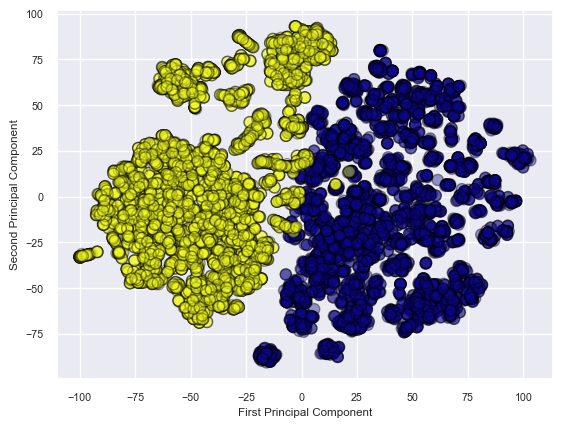

In [25]:
tsne_data = (
    resampled_df
    .select_dtypes(include =[np.number])
    .drop('Healthy_Status', axis = 1).copy()
)

scaled_data = StandardScaler().fit(tsne_data).transform(tsne_data)
tsne = TSNE(random_state = 0)
scaled_data_tsne = tsne.fit_transform(scaled_data)

plt.scatter(scaled_data_tsne[:,0], scaled_data_tsne[:,1], c=resampled_df['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

–ö–∞–∫ –≤–∏–¥–Ω–æ –Ω–∞ —Ä–∏—Å—É–Ω–∫–µ –≤—ã—à–µ, –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ —É—Å—Ç—Ä–∞–Ω—ë–Ω, —Å–æ—Ö—Ä–∞–Ω–∏–º –ø–æ–ª—É—á–∏–≤—à–∏–µ—Å—è –¥–∞–Ω–Ω—ã–µ –∏ –ø—Ä–∏—Å—Ç—É–ø–∏–º –∫ –æ–±—É—á–µ–Ω–∏—é –º–æ–¥–µ–ª–µ–π

In [26]:
resampled_df.to_parquet('processed_data.parquet', index=False)

resampled_df = pd.read_parquet('processed_data.parquet')
resampled_df.head(3)

rr_interval  p_end  qrs_onset  qrs_end  t_end  p_axis  qrs_axis  t_axis  \
0          659    128        170      258    518      81        77      79   
1          722    124        162      246    504      77        75      70   
2          600    130        162      244    474      79        72      77   

   embedding_1  embedding_2  ...  embedding_1016  embedding_1017  \
0     0.042272     0.006615  ...       -0.027275        0.019929   
1     0.042272     0.006615  ...       -0.027275        0.019929   
2     0.018187    -0.009254  ...       -0.038788        0.002239   

   embedding_1018  embedding_1019  embedding_1020  embedding_1021  \
0       -0.033963        0.019968        0.002488        0.009422   
1       -0.033963        0.019968        0.002488        0.009422   
2       -0.036737        0.019546        0.012647        0.011644   

   embedding_1022  embedding_1023  embedding_1024  Healthy_Status  
0       -0.023444       -0.004205        0.008589               0  
1       -0.023444       -0.004205        0.008589               0  
2       -0.017534       -0.018541        0.009547               1  

[3 rows x 1033 columns]

# LAB3 AutoML

In [27]:
target_column = 'Healthy_Status'

X = resampled_df.drop(target_column, axis=1)
y = resampled_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
import os

directory = 'autoML_models'
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f'directory "{directory}" was created')
else:
    print(f'directory "{directory}" already exists')

directory "autoML_models" already exists


### Lama

In [29]:
task = Task('multiclass')

automl = TabularAutoML(
    task=task,
    cpu_limit=-1,
    general_params={'use_algos': 'auto'},
    reader_params={'cv': 3, 'random_state': 42}
)

train_data = pd.concat([X_train, y_train], axis=1)
roles = {
    'target': target_column,
    'drop': []
}

oof_pred = automl.fit_predict(
    train_data=train_data,
    roles=roles,
    verbose=1
)

test_pred = automl.predict(X_test)
y_pred = test_pred.data.argmax(axis=1)

accuracy, precision, recall = (
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
)

clear_output(wait=False)
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [30]:
with open(f'{directory}/lightautoml_electrocardiogram_m2_model.pkl', 'wb') as f:
    pickle.dump(automl, f)

with open(f'{directory}/lightautoml_electrocardiogram_m2_model.pkl', 'rb') as f:
    loaded_automl = pickle.load(f)

new_pred = loaded_automl.predict(X_test).data.argmax(axis=1)
accuracy, precision, recall = (
    accuracy_score(y_test, new_pred),
    precision_score(y_test, new_pred, average='weighted'),
    recall_score(y_test, new_pred, average='weighted'),
)
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [31]:
try:
    algo = loaded_automl.levels[0][0].ml_algos[0]
    print(f"–¢–∏–ø –∞–ª–≥–æ—Ä–∏—Ç–º–∞: {type(algo).__name__}")
    
    if hasattr(algo, 'models'):
        model = algo.models[0]
        print(f"–¢–∏–ø –º–æ–¥–µ–ª–∏: {type(model).__name__}")
        attrs_to_show = [attr for attr in dir(model) if not attr.startswith('_')]

        print(f"\n=== –ü–∞—Ä–∞–º–µ—Ç—Ä—ã {type(model).__name__} ===")
        for attr in attrs_to_show:
            try:
                value = getattr(model, attr)
                
                if attr == 'model':
                    print("\n–ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏:")
                    print(value)
                elif attr == 'loss':
                    print(f"\n–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å: {value.__class__.__name__}")
                else:
                    print(f"{attr}: {value}")
                    
            except Exception as e:
                print(f"{attr}: [–Ω–µ –¥–æ—Å—Ç—É–ø–µ–Ω]")

except Exception as e:
    print(f"–û—à–∏–±–∫–∞: {str(e)}")
    print("–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–π –º–µ—Ç–æ–¥:")
    print(loaded_automl.print_model_info())




–¢–∏–ø –∞–ª–≥–æ—Ä–∏—Ç–º–∞: LinearLBFGS
–¢–∏–ø –º–æ–¥–µ–ª–∏: TorchBasedLogisticRegression

=== –ü–∞—Ä–∞–º–µ—Ç—Ä—ã TorchBasedLogisticRegression ===
categorical_idx: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
cs: [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
data_size: 2544
early_stopping: 2
embed_sizes: [ 9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9 11]
fit: <bound method TorchBasedLinearEstimator.fit of <lightautoml.ml_algo.torch_based.linear_model.TorchBasedLogisticRegression object at 0x00000131D9B7A9D0>>

–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å: TorchLossWrapper
max_iter: 100
metric: <lightautoml.tasks.losses.base.MetricFunc object at 0x00000131ACA02F10>

–ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏:
CatMulticlass(
  (linear): Linear(in_features=2516, out_features=2, bias=False)
  (final_act): SoftmaxClip(
    (smax): Softmax(

### Fedot

In [32]:
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è Fedot —Å —è–≤–Ω—ã–º —É–∫–∞–∑–∞–Ω–∏–µ–º –¥–æ—Å—Ç—É–ø–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π
automl_model = Fedot(
    problem='classification',
    preset='fast_train',
    # timeout=10,  # 2 –º–∏–Ω—É—Ç—ã –Ω–∞ –ø–æ–¥–±–æ—Ä
    available_operations=['rf', 'logit','mlp', 'xgboost'],
    logging_level=logging.CRITICAL,
    with_tuning=True,
    n_jobs=-1,
    seed=42
)

try:
    pipeline = automl_model.fit(features=X_train, target=y_train)
    
    y_pred = automl_model.predict(features=X_test)
    
    accuracy, precision, recall = (
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
    )
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

    
except Exception as e:
    print(f'–ü—Ä–æ–∏–∑–æ—à–ª–∞ –æ—à–∏–±–∫–∞: {str(e)}')
    print('–ü–æ–ø—Ä–æ–±—É–π—Ç–µ –æ–±–Ω–æ–≤–∏—Ç—å Fedot –∏–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥—Ä—É–≥–æ–π –ø—Ä–µ—Å–µ—Ç')

2025-04-03 00:23:34,293 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
Accuracy: 0.9995039682539683, Precision: 0.9995044465873781, Recall: 0.9995039682539683


In [33]:
def get_pipeline_info(pipeline):
    """–†–µ–∫—É—Ä—Å–∏–≤–Ω–æ –ø–æ–ª—É—á–∞–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –ø–∞–π–ø–ª–∞–π–Ω–µ"""
    info = []
    
    def process_node(node, level=0):
        node_info = {
            'type': str(node.operation.operation_type),
            'params': getattr(node, 'parameters', {}),
            'level': level,
            'node_object': node  # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Å–∞–º –æ–±—ä–µ–∫—Ç —É–∑–ª–∞
        }
        info.append(node_info)
        
        if hasattr(node, 'nodes_from'):
            for parent in node.nodes_from:
                process_node(parent, level + 1)
    
    process_node(pipeline.root_node if hasattr(pipeline, 'root_node') else pipeline)
    return info

best_pipeline = automl_model.current_pipeline
pipeline_info = get_pipeline_info(best_pipeline)

for item in pipeline_info:
    print(f"{'  ' * item['level']}–£–∑–µ–ª: {item['type']}")
    print(f"{'  ' * item['level']}–ü–∞—Ä–∞–º–µ—Ç—Ä—ã: {item['params']}")
    
    node = item['node_object']
    try:
        if hasattr(node, 'fitted_operation'):
            fitted_params = node.fitted_operation.get_params()
            print('Fitted_params: {')
            for param in fitted_params:
                print(f'\t{param}: {fitted_params[param]}')
            print('}')
    except Exception as e:
        print(f'–ù–µ —É–¥–∞–ª–æ—Å—å –ø–æ–ª—É—á–∏—Ç—å fitted –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {str(e)}')

–£–∑–µ–ª: mlp
–ü–∞—Ä–∞–º–µ—Ç—Ä—ã: {}
Fitted_params: {
	activation: relu
	alpha: 0.0001
	batch_size: auto
	beta_1: 0.9
	beta_2: 0.999
	early_stopping: False
	epsilon: 1e-08
	hidden_layer_sizes: (100,)
	learning_rate: constant
	learning_rate_init: 0.001
	max_fun: 15000
	max_iter: 200
	momentum: 0.9
	n_iter_no_change: 10
	nesterovs_momentum: True
	power_t: 0.5
	random_state: None
	shuffle: True
	solver: adam
	tol: 0.0001
	validation_fraction: 0.1
	verbose: False
	warm_start: False
}


In [34]:
with open(f'{directory}/fedot_model.pkl', 'wb') as f:
    pickle.dump(automl_model, f)

with open(f'{directory}/fedot_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

y_pred = loaded_model.predict(features=X_test)

accuracy, precision, recall = (
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
)
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 0.9995039682539683, Precision: 0.9995044465873781, Recall: 0.9995039682539683


### TPOT

In [35]:
tpot = TPOTClassifier(generations=4, population_size=10, random_state=42, verbosity=2, n_jobs=-1, max_time_mins=30, cv=3)
tpot.fit(X_train, y_train)

Version 0.12.1 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


                                                                            
Generation 1 - Current best internal CV score: 0.999255721625581
                                                                            
Generation 2 - Current best internal CV score: 0.999255721625581
                                                                            
Generation 3 - Current best internal CV score: 0.9995038298007456
                                                                            
Generation 4 - Current best internal CV score: 0.9995038298007456
                                                          
Best pipeline: RandomForestClassifier(GradientBoostingClassifier(input_matrix, learning_rate=1.0, max_depth=1, max_features=0.6000000000000001, min_samples_leaf=19, min_samples_split=19, n_estimators=100, subsample=0.7000000000000001), bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)


TPOTClassifier(cv=3, generations=4, max_time_mins=30, n_jobs=-1,
               population_size=10, random_state=42, verbosity=2)

In [36]:
y_pred = tpot.predict(X_test)
accuracy, precision, recall = (
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [37]:
from joblib import dump

final_pipeline = tpot.fitted_pipeline_

dump(final_pipeline, f'{directory}/tpot_final_pipeline.joblib')

from joblib import load
from sklearn.metrics import accuracy_score

loaded_pipeline = load(f'{directory}/tpot_final_pipeline.joblib')

y_pred = loaded_pipeline.predict(X_test)
accuracy, precision, recall = (
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [38]:
for step_name, step_estimator in loaded_pipeline.steps:
    print(f"–¢–∏–ø: {type(step_estimator).__name__}")
    params = step_estimator.get_params()
    print("–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:")
    for el in params:
        print(f'\t{el}: {params[el]}')

–¢–∏–ø: StackingEstimator
–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
	estimator__ccp_alpha: 0.0
	estimator__criterion: friedman_mse
	estimator__init: None
	estimator__learning_rate: 1.0
	estimator__loss: log_loss
	estimator__max_depth: 1
	estimator__max_features: 0.6000000000000001
	estimator__max_leaf_nodes: None
	estimator__min_impurity_decrease: 0.0
	estimator__min_samples_leaf: 19
	estimator__min_samples_split: 19
	estimator__min_weight_fraction_leaf: 0.0
	estimator__n_estimators: 100
	estimator__n_iter_no_change: None
	estimator__random_state: 42
	estimator__subsample: 0.7000000000000001
	estimator__tol: 0.0001
	estimator__validation_fraction: 0.1
	estimator__verbose: 0
	estimator__warm_start: False
	estimator: GradientBoostingClassifier(learning_rate=1.0, max_depth=1,
                           max_features=0.6000000000000001, min_samples_leaf=19,
                           min_samples_split=19, random_state=42,
                           subsample=0.7000000000000001)
–¢–∏–ø: RandomForestClassifier
–ü–

–ö–∞–∫ –≤–∏–¥–Ω–æ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º, –≤—Å–µ –º–æ–¥–µ–ª–∏ —É—Å–ø–µ—à–Ω–æ —Å–ø—Ä–∞–≤–∏–ª–∏—Å—å —Å –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ–π. –õ—É—á—à–µ –≤—Å–µ—Ö –≤ —ç—Ç–æ—Ç —Ä–∞–∑ —Å–ø—Ä–∞–≤–∏–ª–∞—Å—å Lama

# Lab4 MLFlow

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –ø—Ä–∏–º–µ—Ä–æ–≤ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Ä–µ—à–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –∑–∞–¥–∞—á–∏ –ø–æ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—é –∏ –æ—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π –±—ã–ª–∞ –ø—Ä–æ–≤–µ–¥–µ–Ω–∞ –≤—ã—à–µ.
–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–∞–Ω–µ–µ –º–æ–¥–µ–ª–µ–π –∏–º–µ—é—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–Ω–∏–µ, —Ç–∞–∫ –∫–∞–∫ –∑–∞–¥–∞—á–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ Iris –∫—Ä–∞–π–Ω–µ –ø—Ä–æ—Å—Ç–∞. –í —Å–≤—è–∑–∏ —Å —ç—Ç–∏–º.

–ü–µ—Ä–µ–π–¥—ë–º –∫ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏

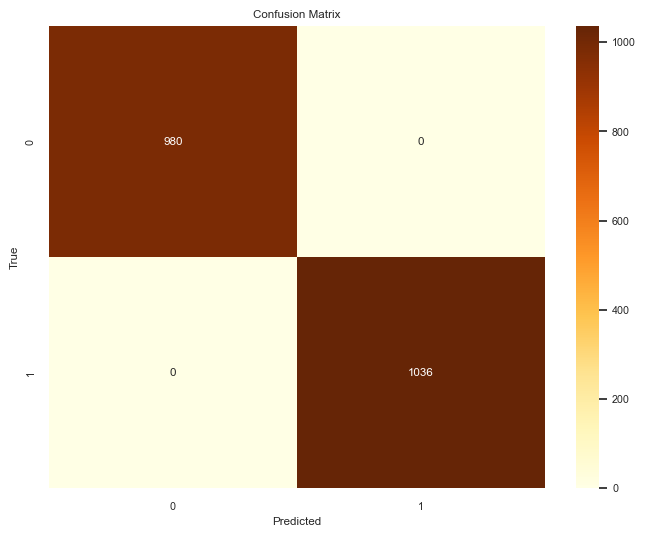

In [39]:
# –ü–æ—Å–ª–µ –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (y_test –∏ y_pred –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –∫–æ–¥–∞)
with open(f'{directory}/lightautoml_electrocardiogram_m2_model.pkl', 'rb') as f:
    loaded_automl = pickle.load(f)

y_pred = loaded_automl.predict(X_test).data.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=df_expanded[target_column].unique(),
            yticklabels=df_expanded[target_column].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

–ö–∞–∫ –≤–∏–¥–Ω–æ, –º–æ–¥–µ–ª—å –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –¥–µ–ª–∞–µ—Ç –∏–¥–µ–∞–ª—å–Ω–æ —Ç–æ—á–Ω—ã–µ –ø—Ä–æ–≥–Ω–æ–∑—ã

### –†–∞–∑–≤–µ—Ä—Ç—ã–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –≤ MLFlow

1. –í–≤–æ–¥–∏–º –≤ –∫–æ–º–∞–Ω–¥–Ω—É—é —Å—Ç—Ä–æ–∫—É: `mlflow server --host 127.0.0.1 --port 8080`
2. –ü–µ—Ä–µ—Ö–æ–¥–∏–º –ø–æ –∞–¥—Ä–µ—Å—É: `http://127.0.0.1:8080`

–ü—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ–º —Ä–∞–±–æ—Ç—É —Å MLFlow –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ Lama

In [40]:
def collect_model_info(loaded_automl):
    model_info = {
        'algorithm_type': None,
        'model_type': None,
        'parameters': {},
        'architecture': None,
        'loss_function': None,
        'error': None,
        'alternative_info': None
    }
    
    try:
        algo = loaded_automl.levels[0][0].ml_algos[0]
        model_info['algorithm_type'] = type(algo).__name__
        
        if hasattr(algo, 'models'):
            model = algo.models[0]
            model_info['model_type'] = type(model).__name__
            attrs_to_show = [attr for attr in dir(model) if not attr.startswith('_')]

            for attr in attrs_to_show:
                try:
                    value = getattr(model, attr)
                    
                    if attr == 'model':
                        model_info['architecture'] = str(value)
                    elif attr == 'loss':
                        model_info['loss_function'] = value.__class__.__name__
                    else:
                        model_info['parameters'][attr] = str(value)
                        
                except Exception as e:
                    model_info['parameters'][attr] = '[–Ω–µ –¥–æ—Å—Ç—É–ø–µ–Ω]'

    except Exception as e:
        model_info['error'] = str(e)
        model_info['alternative_info'] = str(loaded_automl.print_model_info())
    
    return model_info

In [41]:
mlflow.set_tracking_uri("http://127.0.0.1:8080")
mlflow.set_experiment("ECG_Classification")  # –ù–∞–∑–≤–∞–Ω–∏–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞

params = {
    'task': 'multiclass',
    'cpu_limit': -1,
    'general_params': {'use_algos': 'auto'},
    'reader_params': {'cv': 3, 'random_state': 42}
}

roles = {
    'target': target_column,
    'drop': []
}
# –°—Ç–∞—Ä—Ç —Ç—Ä–µ–∫–∏–Ω–≥–∞ –≤ MLflow
with mlflow.start_run():
    # –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
    mlflow.log_params(params)
    mlflow.log_params(roles)
    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
    automl = TabularAutoML(
        task=Task(params['task']),
        cpu_limit=params['cpu_limit'],
        general_params=params['general_params'],
        reader_params=params['reader_params']
    )
    
    train_data = pd.concat([X_train, y_train], axis=1)
    oof_pred = automl.fit_predict(train_data, roles=roles, verbose=1)

    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    test_pred = automl.predict(X_test)
    y_pred = test_pred.data.argmax(axis=1)

    # –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall
    })
    clear_output(wait=False)
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

    # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –≤ MLflow
    mlflow.sklearn.log_model(automl, "lightautoml_model")
    # –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤ .pkl (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ)
    with open(f'{directory}/lightautoml_electrocardiogram_m2_model.pkl', 'wb') as f:
        pickle.dump(automl, f)
    mlflow.log_artifact(f'{directory}/lightautoml_electrocardiogram_m2_model.pkl')

    model_info = collect_model_info(loaded_automl)
    mlflow.log_param("algorithm_type", model_info['algorithm_type'])
    mlflow.log_param("model_type", model_info['model_type'])
    mlflow.log_param("loss_function", model_info['loss_function'])
    
    if model_info['architecture']:
        mlflow.log_text(model_info['architecture'], "model_architecture.txt")
    
    for param, value in model_info['parameters'].items():
        mlflow.log_param(f"param_{param}", value)
    
    if model_info['error']:
        mlflow.log_param("error", model_info['error'])
        mlflow.log_text(model_info['alternative_info'], "alternative_model_info.txt")
    

Accuracy: 1.0, Precision: 1.0, Recall: 1.0


2025/04/03 01:19:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/03 01:19:44 INFO mlflow.tracking._tracking_service.client: üèÉ View run nebulous-fish-446 at: http://127.0.0.1:8080/#/experiments/597488099350027753/runs/97dc07c628384fb1987d907be76bd761.
2025/04/03 01:19:44 INFO mlflow.tracking._tracking_service.client: üß™ View experiment at: http://127.0.0.1:8080/#/experiments/597488099350027753.
